<b>Task:</b> binary classification (<=50K и >50K) of physical person by level of earnings. 

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv('datasets_features/adult.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df[(df['workclass']=='?')].head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K


In [6]:
# delete empty cell (symbol ?)
df = df[~(df['workclass'] == '?')]
df = df[~(df['occupation'] == '?')]
df = df[~(df['native-country'] == '?')]

#### What to do when empty values?
-change with 'Unknown'<p>
-change with the most popular<p>
-change with the mean (or median) value<p>
-change with zero<p>

In [7]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [8]:
# using LabelEncoder translate sting categoricals into num
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df['race'])
df['race_num'] = le.transform(df['race'] )

le.fit(df['workclass'])
df['workclass_encoder'] = le.transform(df['workclass'])

le.fit(df['education'])
df['education_encoder'] = le.transform(df['education'])

le.fit(df['gender'])
df['gender_encoder'] = le.transform(df['gender'])

le.fit(df['occupation'])
df['occupation_encoder'] = le.transform(df['occupation'])

le.fit(df['relationship'])
df['relationship_encoder'] = le.transform(df['relationship'])

le.fit(df['marital-status'])
df['marital-status_encoder'] = le.transform(df['marital-status'])

le.fit(df['native-country'])
df['native-country_encoder'] = le.transform(df['native-country'])

le.fit(df['income'])
df['income_encoder'] = le.transform(df['income'])

Комментарий преподавателя
Категориальные признаки, которые нельзя между собой математически корректно сравнивать, не стоит переводить через LabelEncoder, т.к. будет выстроена неправильная связь, к примеру, что Unmarried больше и значит лучше, чем Husband, что нелогично, поэтому такие признаки лучше переводить через get_dummies

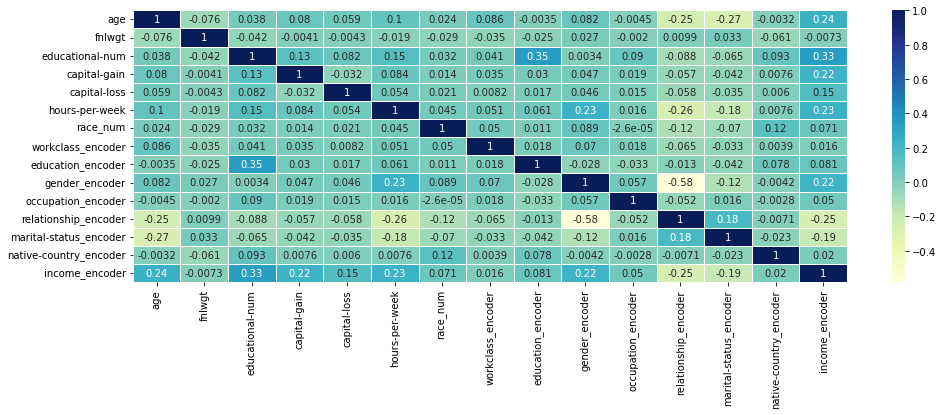

In [9]:
#df.corr() Compute pairwise correlation of columns
plt.figure(figsize = (16,5))
plot_heat_map = sns.heatmap(df.corr(method='pearson'), cmap='YlGnBu', annot=True, linewidths=.5)
plt.show()

### There is noticing that 

<b>[education_encoder]</b> and <b>[educational-num]</b> have the higher correlation then other couples

<b>[hours-per-week]</b> and <b>[gender_encoder]</b> also have the higher correlation

Text(0, 0.5, 'educational-num')

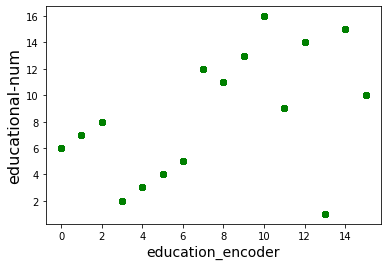

In [11]:
plt.figure()
plt.plot(df['education_encoder'] , df['educational-num'], 'go')
plt.xlabel('education_encoder', fontsize= 14 )
plt.ylabel('educational-num', fontsize= 16 )

Text(0, 0.5, 'race_num')

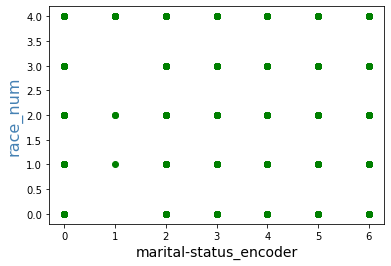

In [104]:
plt.figure()
plt.plot(df['marital-status_encoder'] , df['race_num'], 'go')
plt.xlabel('marital-status_encoder', fontsize= 14 )
plt.ylabel('race_num', fontsize= 16 )

#### Последними тремя графиками я попытался понять на сколько те или иные параметры коррелируют между собой. 
Тепловая диаграмма указывает что коэффициент корреляции выше для education и education-num (что логично), также уровень корреляции выше для [hours-per-week] и [gender_encoder], а также для ряда других фичей. 

Но к сожалению, построенные точечные диаграммы этих зависимостей - не показывают явную корреляцию. 

Например точечная диаграмма df['marital-status_encoder'] , df['race_num'], на мой взгляд, также имеет высокую корреляцию.

Таким образом, над входным датасетом выполнены следующие преобразования:
- удалены пропуски с символом "?";
- категориальные признаки преобразованы в числовой формат.

Для построения моделей логистической регрессии и SVM мною выбраны след фичи:

- age 
- educational-num
- gender (gender_encoder)
- occupation (occupation_encoder)
- marital-status (marital-status_encoder)
- hours-per-week
- native-country(native-country_encoder)

### 1. Logistic Regression

In [71]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [72]:
X = df[['age', 'educational-num', 'gender_encoder', 'occupation_encoder', 'marital-status_encoder', 'hours-per-week', 'native-country_encoder']]
y = df['income_encoder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
model = make_pipeline(
        StandardScaler(),
        LogisticRegression(max_iter=100)
)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [74]:
model.score(X_test, y_test)

0.798783858485351

<b>Вывод 1:</b> 

Модель логистической регрессии показала неплохую оценку в 0.79 при достаточно небольшом приобразовании входных даннных.

Могу предположить, что данный датасет является изначално хорошо подготовленным, т.к. фичи имеют низкую корреляцию между собой. При добавлении в матрицу наблюдений доболнительных признаков (<b>[workclass],[capital-loss], [capital-gain], [relationship]'</b>) <i>score</i> удалось улучшить до показателя 0.82 (но я решил не добавлять это в свое решение, прошу поверить на слово)

### 2. SVM

In [90]:
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [91]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [92]:
clf.score(X_test, y_test)

0.8253178551686015

<b>Вывод 2:</b>
Модель SVM с параметром kernel='rbf' показала более высокий результат чем Логистическая Регрессия на 3 процента. 
Также SVM затрачивает больше времени на обработку данных.

<b>Общий вывод :</b> на мой взгляд, результат в ~80% является примемлимым при условии низких затрат на обработку данных, но ошибка предсказания в 20% достаточно велика, например, при реализации похожего кейса в бизнес задачах.

Вероятно, стоит построить графики распределения случайной вечины и проверить их на нормальность, проверить данные на гомоскедастичность, поискать выбросы. Также стоит построить обучающие модели Линейной Регрессии и SVM в с разным составом содержанием матрицы наблюдений и проверить, изменится ли при каком-либо другом наборе данных оценка в большую сторону.

Также не исключено, что лучшем решением было бы разложить какой-нибудь наиболее содержательный признак по столбцам, преобразовав его таким образом в вектор.